<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/Rough%20Work/Predict_Weekend_Ridership_with_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Final%20Dataset.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data

,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451
2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508
2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490
2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198
2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,2020,2,2020-02,25,Tuesday,False,5.6,1.7,3.7,-1.906897,5.606897,0.2,2.137931,-1.937931,0.0,13650,15097,29727,36973,17192,6865,10485,99431,229420,False,226142.086667,260553.155725,191731.017608
2020-02-26,2020,2,2020-02,26,Wednesday,False,4.1,-3.2,0.4,-1.906897,2.306897,11.8,2.137931,9.662069,0.0,12596,13557,26690,33732,14331,6215,9749,98193,215063,False,227296.503311,254365.810172,200227.196451
2020-02-27,2020,2,2020-02,27,Thursday,False,-2.7,-5.3,-4.0,-1.906897,-2.093103,3.1,2.137931,0.962069,0.0,11349,13074,26818,34180,15281,5522,9151,94998,210373,False,224966.615894,253295.696280,196637.535508


In [7]:
saturday_data = data.loc[data['Weekday'] == 'Saturday']
sunday_data = data.loc[data['Weekday'] == 'Sunday']
weekend_data= pd.concat([saturday_data, sunday_data])
weekend_data = weekend_data.sort_values(by='Date' ,ascending=True)
weekend_data

,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198
2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488
2017-03-11,2017,3,2017-03,11,Saturday,False,-5.3,-12.5,-8.9,-0.251613,-8.648387,0.2,2.335484,-2.135484,0.5,877,463,6397,11193,174,0,199,10584,29887,False,45352.333333,73886.656469,16818.010198
2017-03-12,2017,3,2017-03,12,Sunday,False,-3.8,-12.5,-8.2,-0.251613,-7.948387,0.0,2.335484,-2.335484,0.5,756,345,4031,6915,97,2,102,6721,18969,False,32455.370861,53039.519234,11871.222488
2017-03-18,2017,3,2017-03,18,Saturday,False,3.1,0.1,1.6,-0.251613,1.851613,1.5,2.335484,-0.835484,0.0,1187,632,8199,13669,210,0,276,15697,39870,False,45352.333333,73886.656469,16818.010198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-15,2020,2,2020-02,15,Saturday,False,1.1,-8.7,-3.8,-1.906897,-1.893103,0.4,2.137931,-1.737931,0.0,1535,259,8070,11895,98,0,1014,15296,38167,False,45352.333333,73886.656469,16818.010198
2020-02-16,2020,2,2020-02,16,Sunday,False,4.3,-1.5,1.4,-1.906897,3.306897,0.4,2.137931,-1.737931,0.0,1501,169,6133,9534,73,0,795,12262,30467,False,32455.370861,53039.519234,11871.222488
2020-02-22,2020,2,2020-02,22,Saturday,False,5.5,-3.2,1.1,-1.906897,3.006897,0.2,2.137931,-1.937931,0.0,2323,271,9654,15429,121,0,1181,17267,46246,False,45352.333333,73886.656469,16818.010198


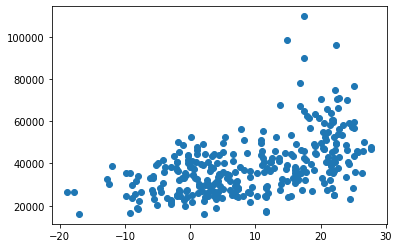

In [8]:
plt.scatter(weekend_data['Mean Temp (°C)'], weekend_data['Total GO Ridership'])

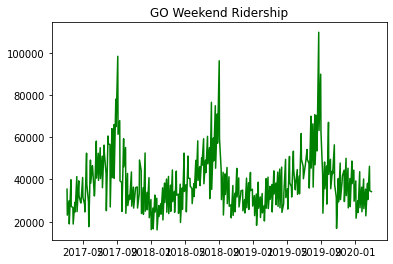

In [9]:
plt.plot(weekend_data.index, weekend_data['Total GO Ridership'], color='green')
plt.title('GO Weekend Ridership')
plt.show()

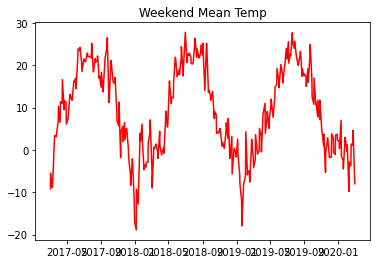

In [10]:
plt.plot(weekend_data.index, weekend_data['Mean Temp (°C)'], color='red')
plt.title('Weekend Mean Temp')
plt.show()

In [11]:
Y = weekend_data['Total GO Ridership']
X = weekend_data['Mean Temp (°C)'].values.reshape(-1, 1)

weekend_model = sklearn.linear_model.LinearRegression().fit(X,Y)
print(weekend_model.coef_)
print(weekend_model.intercept_)

[671.86679794]
32640.777367924864


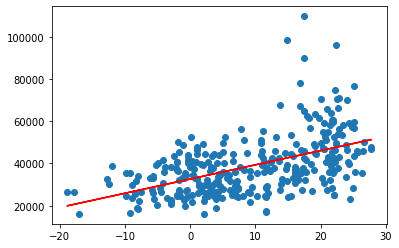

In [12]:
weekend_predict = weekend_model.predict(X)
plt.scatter(x=weekend_data['Mean Temp (°C)'], y=weekend_data['Total GO Ridership'])
plt.plot(X, weekend_predict, 'r-')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y, weekend_predict)
rmse = np.sqrt(mse)
print(rmse)

12055.52441187086


In [14]:
print(weekend_model.predict(array([[25],[15],[5],[-5]])))

[49437.44731641 42718.77933702 36000.11135762 29281.44337823]
